# 31 MatplotLib + Pandas Plotting

In [1]:
# importing libraries

import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# loading data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

# Data Cleanup
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])

C:\Users\erard\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Counts of job postings

Rather than using the bar, barh or plot function like we've done previously, there's a quicker way to create graphs!

Let's look at the job counts again.

In [2]:
job_counts = df.job_title_short.value_counts()

job_counts

job_title_short
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Business Analyst              49063
Software Engineer             44929
Senior Data Engineer          44563
Senior Data Scientist         36957
Senior Data Analyst           29216
Machine Learning Engineer     14080
Cloud Engineer                12331
Name: count, dtype: int64

<Axes: xlabel='job_title_short'>

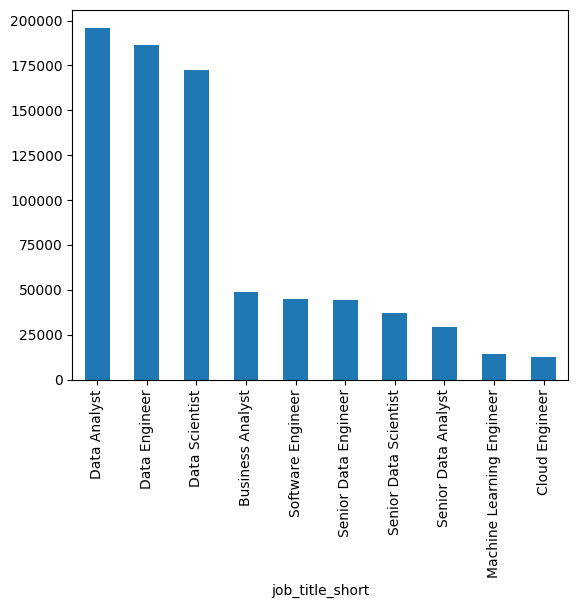

In [4]:
job_counts.plot(kind="bar")

This is a lot less code and the formatting is better automatically!

We can also update some formatting if we want, just like we did before!

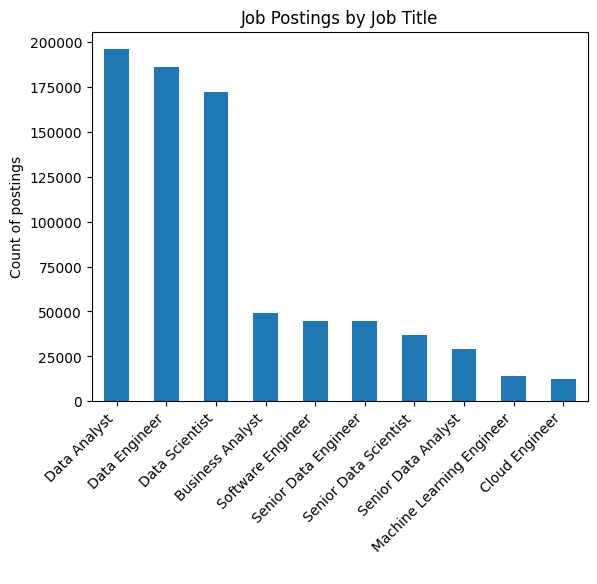

In [6]:
job_counts.plot(kind="bar")
plt.ylabel("Count of postings")
plt.xlabel(" ")
plt.title("Job Postings by Job Title")
plt.xticks(rotation = 45, ha="right")
plt.show()

That was how we do it for a "series". Now, let's see how we can do it on a dataframe!

We'll need to specify the x and y values for a dataframe, as there are many columns to use. This is not the case in a series, because the computation has already been done to create the x and y based on the operation we wanted.

In [7]:
# let's plot how the salary is trending over the year in 2023

df[["job_posted_date", "salary_year_avg"]].dropna(subset=["salary_year_avg"])

,job_posted_date,salary_year_avg
28,2023-08-01 13:37:57,109500.0
77,2023-06-26 14:22:54,140000.0
92,2023-02-21 13:29:59,120000.0
100,2023-07-31 13:01:18,228222.0
109,2023-10-12 13:02:19,89000.0
...,...,...
785624,2023-08-31 06:02:16,139216.0
785641,2023-01-04 16:36:07,150000.0
785648,2023-04-12 06:02:51,221875.0
785682,2023-03-04 06:16:08,157500.0


<Axes: xlabel='job_posted_date'>

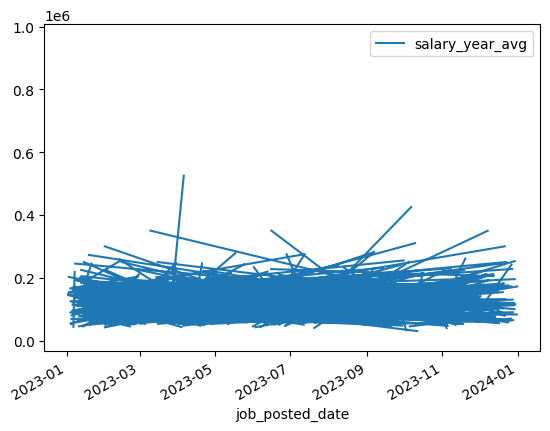

In [9]:
df.plot(x="job_posted_date", y="salary_year_avg", kind="line")

The above graph looks like nothing, but that's fine. it's just to teach us how to use dataframes and the plot function to graph something directly.

# 31 Problems

## 1.31.1

Create a bar plot with the Pandas .plot() method showing the top 5 job posting platforms (e.g., LinkedIn, Upwork, etc.) with the highest number of job postings. Use the job_via column to count the number of postings for each platform.

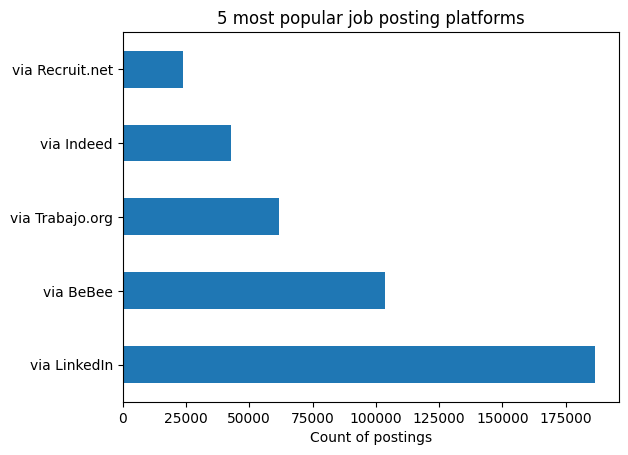

In [20]:
platform_postings = df.job_via.value_counts().head(5)

platform_postings.plot(kind="barh")
plt.xlabel("Count of postings")
plt.ylabel("")
plt.title("5 most popular job posting platforms")
plt.show()

## 1.31.2

Create a line plot showing the trend of job postings over time using the Pandas method to plot:

- Create a DataFrame called monthly_job_counts and use the job_posted_date column to count the number of job postings for each month (in the format 'Jan').
- Add labels for the x-axis (label as 'Month'), y-axis (label as 'Number of Job Postings'), and a title (set as 'Trend of Job Postings Over Time') for the chart.

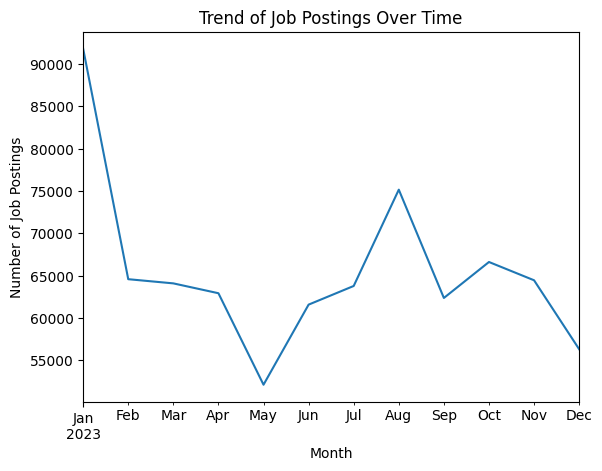

In [25]:
# creating a month column

df["job_posted_month"] = df["job_posted_date"].dt.to_period('M') # .to_period("M") -» it adds the 3-lettered month format rather than a number from 1-12 

#group by month and sort
group_by_month = df.job_posted_month.value_counts()

group_by_month_sorted = group_by_month.sort_index()

# plot the graph
group_by_month_sorted.plot(kind="line")
plt.xlabel("Month")
plt.ylabel("Number of Job Postings")
plt.title("Trend of Job Postings Over Time")
plt.show()


## 1.31.3

Create a horizontal bar plot showing the top 5 job locations with the highest number of job postings:

- Use the job_location column to count the number of postings for each location.
- Add in labels for the x-axis (label as 'Count of Jobs'), y-axis (label as 'Job Location'), and a title (set as 'Number of Job Postings by Job Location') for the chart.

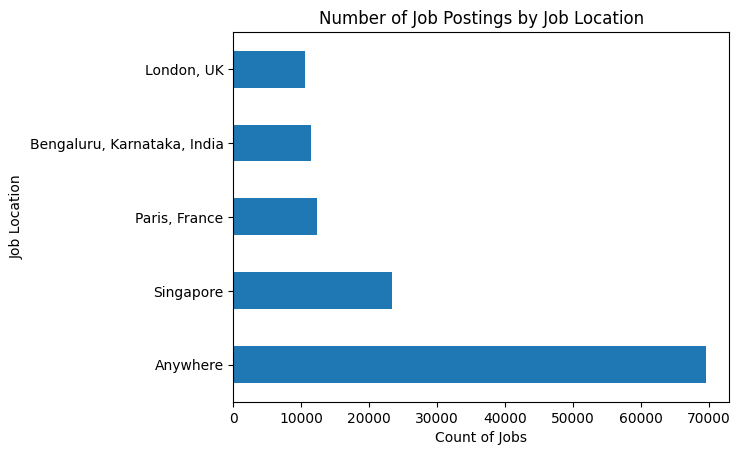

In [29]:
# group by location

locations_ranking = df["job_location"].value_counts().head(5)

locations_ranking.plot(kind="barh")
plt.xlabel("Count of Jobs")
plt.ylabel("Job Location")
plt.title("Number of Job Postings by Job Location")
plt.show()